### **Importing essentials**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Neuron without activation - Regression/Linear **Model**

### Dataset

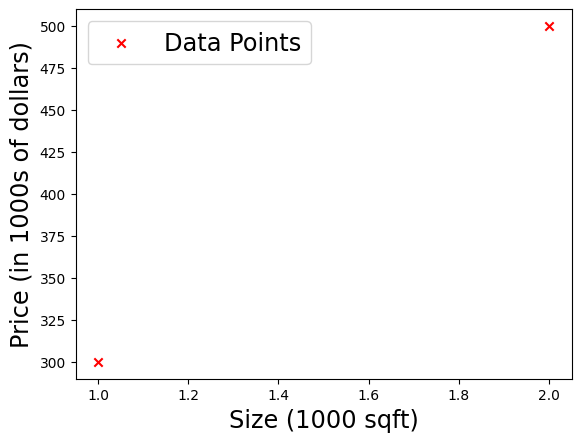

In [3]:
### DataSet
X_train = np.array([[1.0], [2.0]], dtype=np.float32)  # (size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)  # (price in 1000s of dollars)

fig, ax = plt.subplots(1, 1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend(fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()



# Regression/Linear Model

In [4]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')

# Trigger the instantiation of the weights

In [7]:
linear_layer.get_weights()
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)

w, b = linear_layer.get_weights()
print(f"w = {w}, b = {b}")

tf.Tensor([[0.82562125]], shape=(1, 1), dtype=float32)
w = [[0.82562125]], b = [0.]


# Set weights to known values

In [8]:
set_w = np.array([[200]])
set_b = np.array([100])
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


# Compare equation to the layer output

In [9]:
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1, 1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


# Predictions on training data

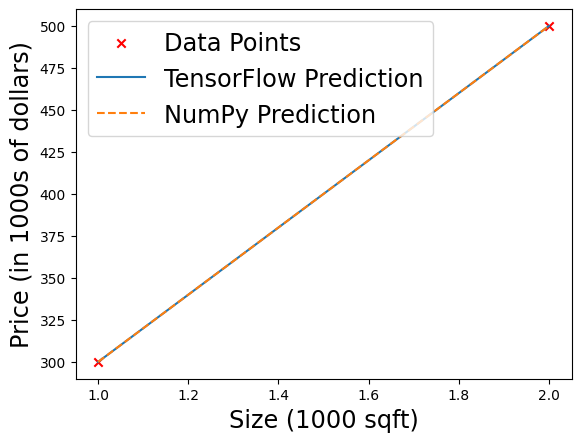

In [10]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b

fig, ax = plt.subplots(1, 1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.plot(X_train, prediction_tf, label='TensorFlow Prediction')
ax.plot(X_train, prediction_np, linestyle='dashed', label='NumPy Prediction')
ax.legend(fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

# Neuron with Sigmoid activation

### DataSet

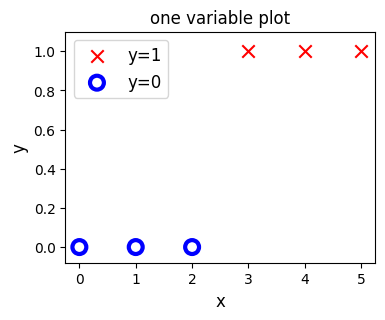

In [11]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1, 1)  # 2-D Matrix
Y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.float32).reshape(-1, 1)  # 2-D Matrix

pos = Y_train == 1
neg = Y_train == 0

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c='red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
           edgecolors='b', lw=3)
ax.set_ylim(-0.08, 1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

# Logistic Neuron

In [12]:
model = Sequential([
    tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name='L1')
])
model.summary()

logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
[[0.5297519]] [0.]
(1, 1) (1,)



# Set weight and bias to known values

In [13]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]



# Compare equation to the layer output

In [14]:
a1 = model.predict(X_train[0].reshape(1, 1))
print(a1)
alog = sigmoid(np.dot(set_w, X_train[0].reshape(1, 1)) + set_b)
print(alog)

1/1 [==============================] - 0s 113ms/step
[[0.01098694]]
tf.Tensor([[0.01098694]], shape=(1, 1), dtype=float64)


# Predictions on training data

1/1 [==============================] - 0s 73ms/step


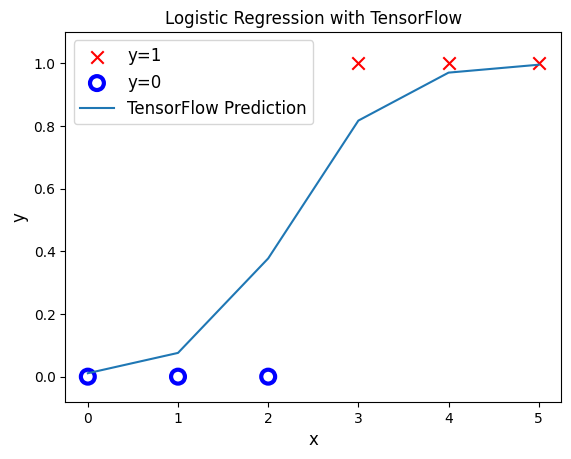

In [16]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c='red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
           edgecolors='b', lw=3)
ax.plot(X_train, model.predict(X_train), label='TensorFlow Prediction')
ax.legend(fontsize=12)
ax.set_ylim(-0.08, 1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('Logistic Regression with TensorFlow')
plt.show()